In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime

#import functions from the functions notebook
%run functions.ipynb
import import_ipynb
import functions


In [2]:
contributions = pd.read_csv('./data/canada_contribution_data.csv', index_col = 'fiscal/election_date' )

C:\Users\wtlem\AppData\Local\Temp\ipykernel_19104\885671884.py:1: DtypeWarning: Columns (4,6,8,9,10,11,14) have mixed types. Specify dtype option on import or set low_memory=False.
  contributions = pd.read_csv('./data/canada_contribution_data.csv', index_col = 'fiscal/election_date' )


In [3]:
#change index to DateTime
contributions.index = pd.to_datetime(contributions.index)

In [4]:
#Check that the index is a DateTime object
isinstance(contributions.index, pd.DatetimeIndex)

True

In [5]:
contributions.dtypes

political_entity                 object
recipient                        object
political_party_of_recipient     object
electoral_district               object
electoral_event                  object
contributor_type                 object
contributor_name                 object
contributor_city                 object
contributor_province             object
contributor_postal_code          object
contribution_received_date       object
monetary_amount                 float64
non_monetary_amount             float64
leadership_contestant            object
total_contribution              float64
election_year                     int64
dtype: object

In [6]:
contributions.isna().sum()

political_entity                     0
recipient                            0
political_party_of_recipient         0
electoral_district              519253
electoral_event                      0
contributor_type                 99828
contributor_name                     0
contributor_city                514564
contributor_province            514564
contributor_postal_code         514564
contribution_received_date      653238
monetary_amount                      0
non_monetary_amount                  0
leadership_contestant           653238
total_contribution                   0
election_year                        0
dtype: int64

In [7]:
#a look at the descriptive statistics of the total_contributions is extremely skewed right, indicating a large number of outliers. 
contributions['total_contribution'].describe()

count    5.980865e+06
mean     2.570389e+02
std      1.365143e+04
min     -1.675000e+03
25%      2.500000e+01
50%      7.200000e+01
75%      2.000000e+02
max      8.494070e+06
Name: total_contribution, dtype: float64

# Examining Distribution of Contributions

In [9]:
total_contributions_median = contributions['total_contribution'].median()
total_contributions_median

72.0

In [10]:
total_contributions_std = contributions['total_contribution'].std()
total_contributions_std

13651.428501361543

In [11]:
cont_3x_std_values = contributions.loc[contributions['total_contribution'] < (total_contributions_median + (3*total_contributions_std))]

C:\Users\wtlem\AppData\Local\Temp\ipykernel_19104\2756954572.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot([df[col].dropna() for col in df.columns], patch_artist=True, notch=True, vert=True, labels=df.columns)


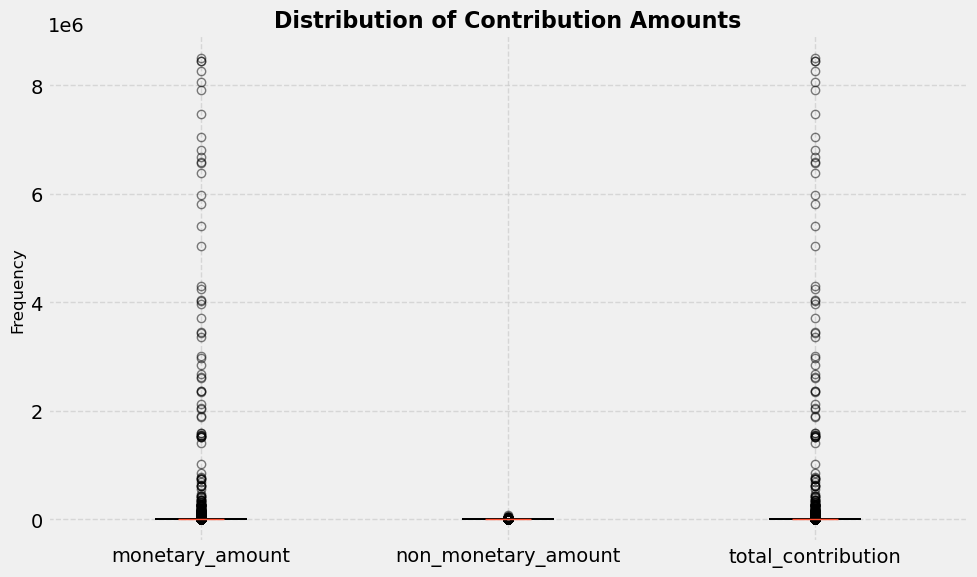

In [12]:
plot_boxplot(contributions[['monetary_amount', 'non_monetary_amount', 'total_contribution']], title = 'Distribution of Contribution Amounts', xlabel = None, ylabel = 'Frequency')

C:\Users\wtlem\AppData\Local\Temp\ipykernel_19104\2756954572.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot([df[col].dropna() for col in df.columns], patch_artist=True, notch=True, vert=True, labels=df.columns)


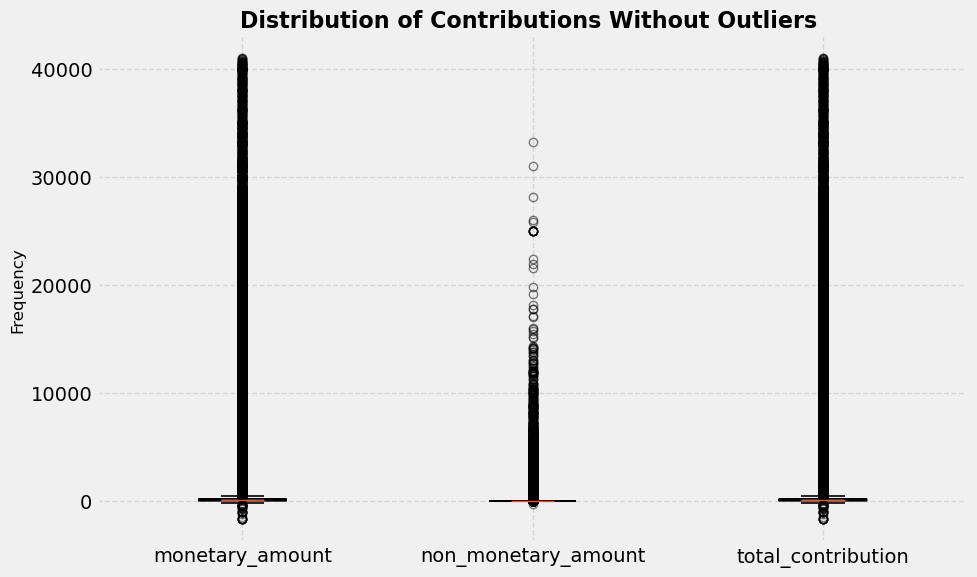

In [13]:
plot_boxplot(cont_3x_std_values[['monetary_amount', 'non_monetary_amount', 'total_contribution']], title = 'Distribution of Contributions Without Outliers ', xlabel = None, ylabel = 'Frequency')


C:\Users\wtlem\AppData\Local\Temp\ipykernel_19104\1068011505.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df.index.year


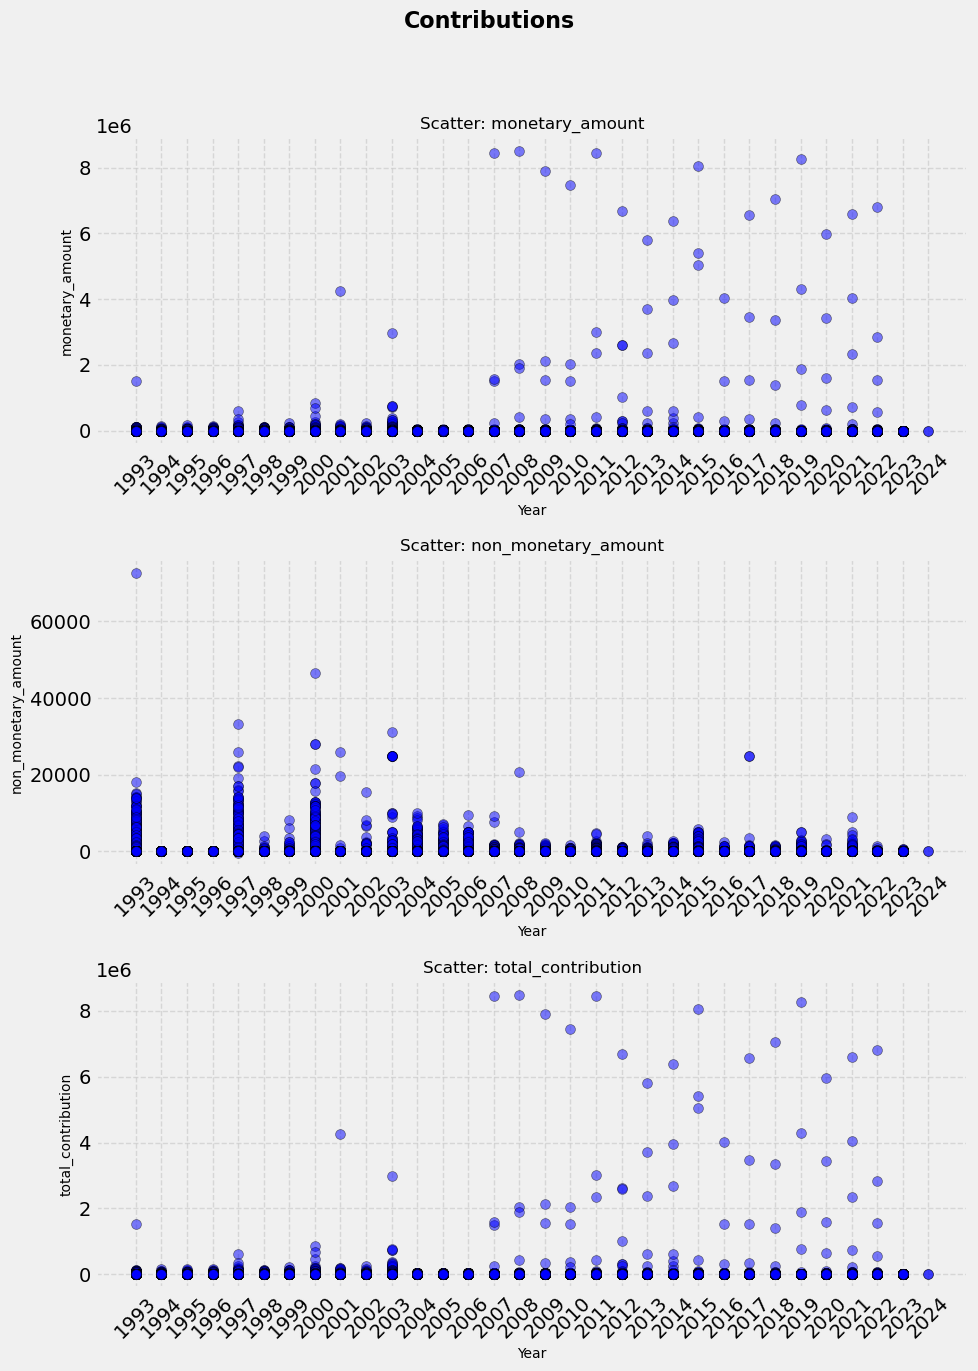

In [14]:
plot_scatter_subplots(
    contributions[['monetary_amount', 'non_monetary_amount','total_contribution']], 
    title = 'Contributions', 
    figsize = (10,14), 
    alpha = 0.5
)

C:\Users\wtlem\AppData\Local\Temp\ipykernel_19104\1068011505.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df.index.year


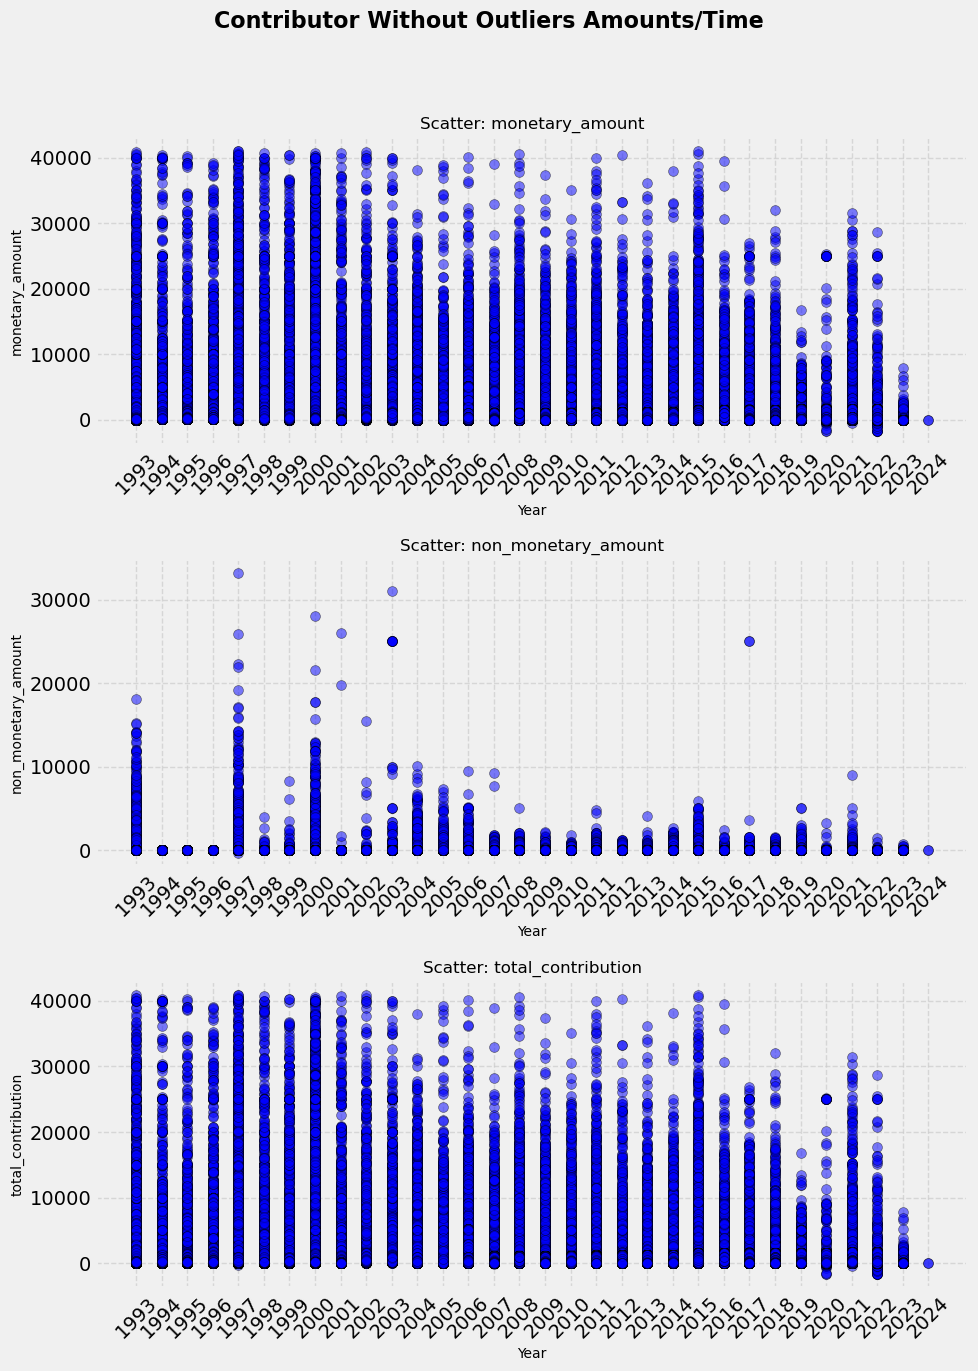

In [15]:
plot_scatter_subplots(
    cont_3x_std_values[['monetary_amount', 'non_monetary_amount','total_contribution']], 
    title = 'Contributor Without Outliers Amounts/Time', 
    figsize = (10,14), 
    alpha = 0.5
)

# Contributions by Political Party

In [18]:
contributions.columns

Index(['political_entity', 'recipient', 'political_party_of_recipient',
       'electoral_district', 'electoral_event', 'contributor_type',
       'contributor_name', 'contributor_city', 'contributor_province',
       'contributor_postal_code', 'contribution_received_date',
       'monetary_amount', 'non_monetary_amount', 'leadership_contestant',
       'total_contribution', 'election_year'],
      dtype='object')

In [19]:
party_mean_group = contributions.groupby('political_party_of_recipient')[['monetary_amount', 'non_monetary_amount','total_contribution']].mean()


Text(0.5, 0, 'Contribution Type')

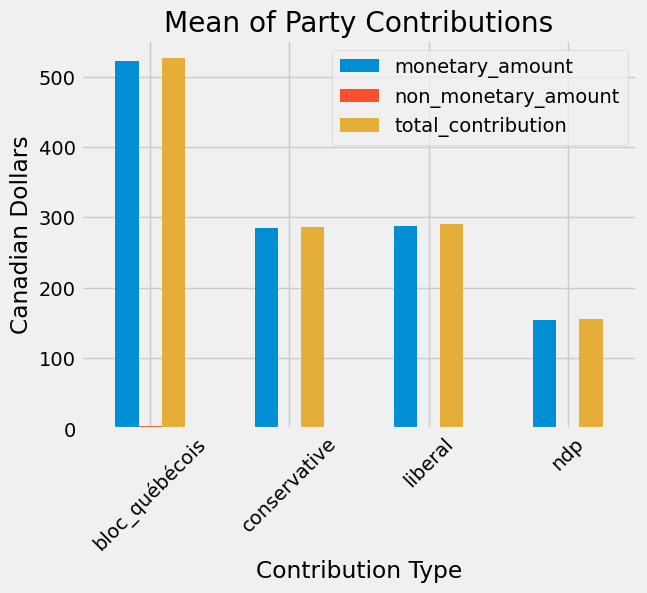

In [20]:
party_mean_group.plot(kind ='bar')
plt.xticks(rotation = 45)
plt.title('Mean of Party Contributions')
plt.ylabel('Canadian Dollars')
plt.xlabel('Contribution Type')

In [21]:
party_median_group = contributions.groupby('political_party_of_recipient')[['monetary_amount', 'non_monetary_amount','total_contribution']].median()


Text(0.5, 0, 'Contribution Type')

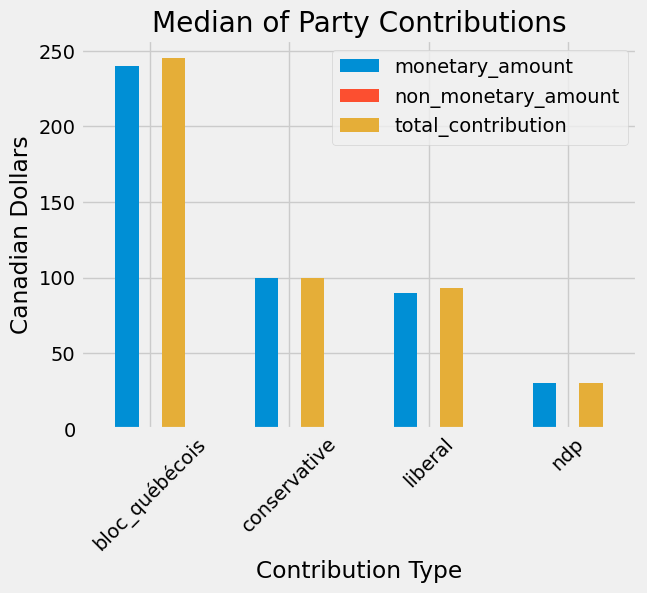

In [22]:
party_median_group.plot(kind ='bar')
plt.xticks(rotation = 45)
plt.title('Median of Party Contributions')
plt.ylabel('Canadian Dollars')
plt.xlabel('Contribution Type')

In [23]:
party_sum_group = contributions.groupby('political_party_of_recipient')[['monetary_amount', 'non_monetary_amount','total_contribution']].sum()


Text(0.5, 0, 'Contribution Type')

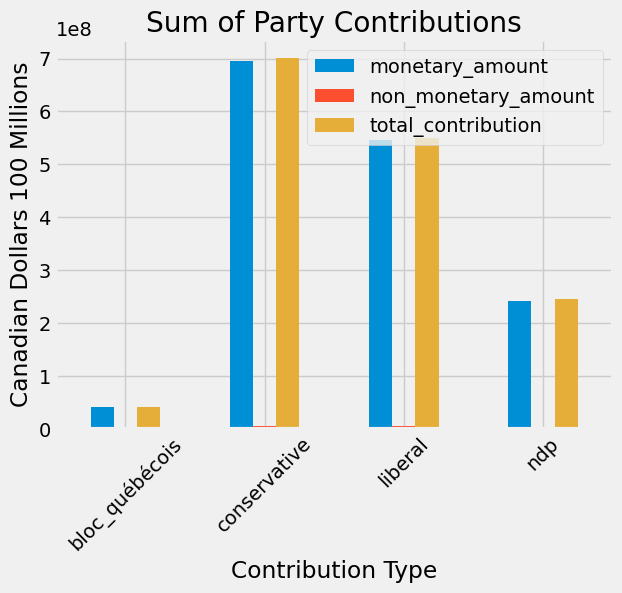

In [24]:
party_sum_group.plot(kind ='bar')
plt.xticks(rotation = 45)
plt.title('Sum of Party Contributions')
plt.ylabel('Canadian Dollars 100 Millions')
plt.xlabel('Contribution Type')

In [25]:
party_count_group = contributions.groupby('political_party_of_recipient')[['monetary_amount', 'non_monetary_amount','total_contribution']].count()

Text(0.5, 0, 'Contribution Type')

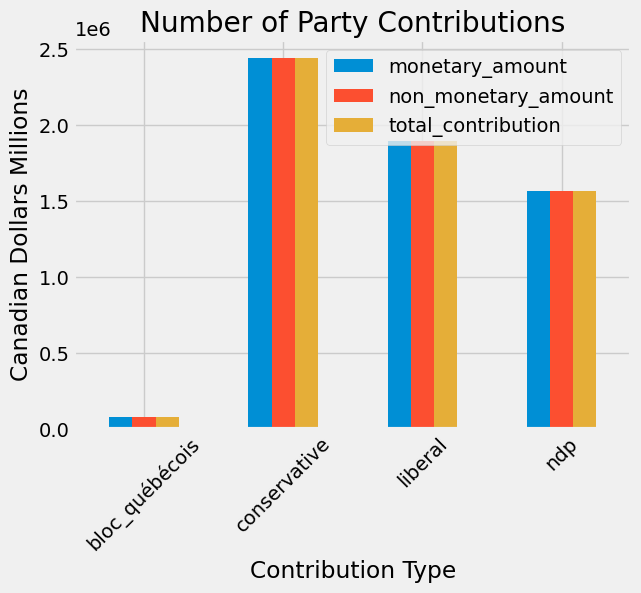

In [26]:
party_count_group.plot(kind ='bar')
plt.xticks(rotation = 45)
plt.title('Number of Party Contributions')
plt.ylabel('Canadian Dollars Millions')
plt.xlabel('Contribution Type')